In [95]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

In [14]:
dataset = load_boston()

In [41]:
X = dataset.data
y = dataset.target
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [82]:
class SimpleLinearRegression():
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def _compute_coef(self, X, y):
        x_mean = np.mean(X, axis=0)
        y_mean = np.mean(y, axis=0)
        numerator = np.sum([(X[i] - x_mean) * (y[i] - y_mean) for i in range(len(X))])
        denominator = np.sum([((X[i] - x_mean)**2) for i in range(len(X))])
        self.coef_ = numerator / denominator
    
    def _compute_intercept(self, X, y):
        x_mean = np.mean(X, axis=0)
        y_mean = np.mean(y, axis=0)
        self.intercept_ = y_mean - self.coef_ * x_mean
    
    def fit(self, X, y):
        self._compute_coef(X, y)
        self._compute_intercept(X, y)
    
    def predict(self, X):
        return self.coef_ * X + self.intercept_
    
    def score(self, X, y):
        y_mean = np.mean(y, axis=0)
        y_pred = self.predict(X)
        numerator = np.sum((y - y_pred)**2)
        denominator = np.sum((y - y_mean)**2)
        return (1-numerator/denominator)
    

In [54]:
X = dataset.data[:, 5]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [96]:
regr = SimpleLinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
r2_score = regr.score(x_test, y_test)
r2_sklearn = metrics.r2_score(y_test, y_pred)

print(regr.coef_)
print(regr.intercept_)
print(r2_score) #je näher an 1, umso besser
print(r2_sklearn)

9.907048838793557
-39.5970552833766
0.3045668295070275
0.3045668295070275


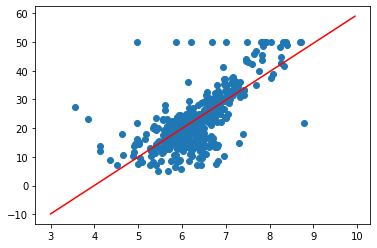

In [77]:
x_arange = np.arange(start=3.0, stop=10.0, step=0.05)
y_arange = regr.predict(x_arange)

plt.scatter(X, y)
plt.plot(x_arange, y_arange, color="red")
plt.show()